In [1]:
#import all the packages and install packages
#pip install pyabf
import pyabf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read the files for future training
filename = 'combined_voltage_900px_v2.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    combined_ratios = pickle.load(file)
filename = 'combined_ground_truth_v2.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    ground_truth = pickle.load(file)

In [3]:
#normalizing the extra columns
cols_to_normalize = combined_ratios.columns[-4:]
scaler = MinMaxScaler()
# Normalize the last four columns
combined_ratios[cols_to_normalize] = scaler.fit_transform(combined_ratios[cols_to_normalize])
# Print the normalized DataFrame
combined_ratios

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,900,901,902,903
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048602,0.899401,0.770270,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.056128,0.926261,0.824324,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.160496,0.483604,0.270270,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090812,0.619767,0.587838,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.052620,0.766026,0.722973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.464705,0.628027,0.175676,1.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.286775,0.910690,0.304054,1.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.224895,0.266419,0.121622,1.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.445814,0.923832,0.283784,1.0


In [4]:
# Convert ground_truth to a numpy array for easier indexing
from sklearn.model_selection import train_test_split
ground_truth = np.array(ground_truth)
# Initialize empty lists to store training and testing datasets and labels
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Get unique labels from the ground_truth list
unique_labels = np.unique(ground_truth)

# Iterate over each unique label
for label in unique_labels:
    # Find the indices where the label matches
    label_indices = np.where(ground_truth == label)[0]

    # Check if there is more than one sample for the label
    if len(label_indices) > 1:
        # Split the label indices into training and testing sets with an 80/20 ratio
        train_indices, test_indices = train_test_split(label_indices, test_size=0.2, random_state=42)

        # Append the corresponding rows from combined_ratios to the training and testing datasets
        training_data.append(combined_ratios.iloc[train_indices])
        testing_data.append(combined_ratios.iloc[test_indices])

        # Append the corresponding labels to the training and testing labels
        training_labels.extend(ground_truth[train_indices])
        testing_labels.extend(ground_truth[test_indices])

# Concatenate all training datasets into a single DataFrame
training_data = pd.concat(training_data)

# Concatenate all testing datasets into a single DataFrame
testing_data = pd.concat(testing_data)

In [5]:
#shuffle the datasets
#from sklearn.utils import shuffle
#train_data_shuffled, train_labels_shuffled = shuffle(training_data, training_labels, random_state=42)
#test_data_shuffled, test_labels_shuffled = shuffle(testing_data, testing_labels, random_state=32)

In [6]:
training_flatten = training_data.values
testing_flatten = testing_data.values
training_graph_data = training_data.iloc[:, :900].values
testing_graph_data = testing_data.iloc[:, :900].values

In [7]:
#convert ground truth to encoded_labels for NN
unique_training_classes = np.unique(training_labels)# Find the unique classes
unique_testing_classes = np.unique(testing_labels)

num_training_classes = len(unique_training_classes)
num_testing_classes = len(unique_testing_classes)

encoded_training_labels = np.zeros((len(training_labels), num_training_classes))  # Initialize an array for one-hot encoding
encoded_testing_labels = np.zeros((len(testing_labels), num_testing_classes))

for i, label in enumerate(training_labels):
    class_training_index = np.where(unique_training_classes == label)[0][0]  # Find the index of the class
    encoded_training_labels[i, class_training_index] = 1  # Set the corresponding element to 1
    
for i, label in enumerate(testing_labels):
    class_testing_index = np.where(unique_testing_classes == label)[0][0]  # Find the index of the class
    encoded_testing_labels[i, class_testing_index] = 1  # Set the corresponding element to 1

print(encoded_testing_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
#training and testing datasets for all descriptor datasets
X_train_NN = np.array(training_graph_data)
X_test_NN = np.array(testing_graph_data)
y_train_NN = encoded_training_labels
y_test_NN = encoded_testing_labels
X_train = training_graph_data
X_test = testing_graph_data

In [9]:
# Original dimensions
num_rows = 30
num_columns = 30
# Initialize an empty list to store the 2D arrays
unflattened_training_arrays = []
# Iterate over each row of the flattened array
for row in X_train_NN:
    # Reshape the row into a 2D array
    unflattened_training_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_training_arrays.append(unflattened_training_row)
# Convert the list of 2D arrays into a new array
training_graph_array = np.array(unflattened_training_arrays)

unflattened_testing_arrays = []
for row in X_test_NN:
    # Reshape the row into a 2D array
    unflattened_testing_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_testing_arrays.append(unflattened_testing_row)
# Convert the list of 2D arrays into a new array
testing_graph_array = np.array(unflattened_testing_arrays)

## CNN

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#get the datasets ready
train_data = training_graph_array
test_data = testing_graph_array
train_labels = encoded_training_labels
test_labels = encoded_testing_labels

# Normalize data
scaler = MinMaxScaler()
scaler.fit(train_data.reshape(train_data.shape[0], -1))  # Fit the scaler on the flattened data

train_data_normalized = scaler.transform(train_data.reshape(train_data.shape[0], -1))
test_data_normalized = scaler.transform(test_data.reshape(test_data.shape[0], -1))

# Reshape the normalized data back to 3D
train_data_normalized_3d = train_data_normalized.reshape(train_data.shape)
test_data_normalized_3d = test_data_normalized.reshape(test_data.shape)

# Add a channel dimension to the data
train_data_normalized_3d = np.expand_dims(train_data_normalized_3d, axis=-1)
test_data_normalized_3d = np.expand_dims(test_data_normalized_3d, axis=-1)

# Design CNN architecture
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(2, 2), activation="relu", input_shape=train_data_normalized_3d.shape[1:]),
    #layers.MaxPooling2D(pool_size=(3, 3)),
    #layers.Conv2D(128, kernel_size=(4, 4), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2, 2)),
    #layers.Conv2D(256, kernel_size=(2, 2), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    #layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(128, activation='relu'),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_runs = 10
losses = []
accuracies = []

for i in range(num_runs):
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(train_data_normalized_3d, train_labels, epochs=100, batch_size=32, validation_data=(test_data_normalized_3d, test_labels), callbacks=[early_stopping])

    # Evaluate the best model on the test data
    loss, accuracy = model.evaluate(test_data_normalized_3d, test_labels)
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average loss and accuracy
average_loss = sum(losses) / num_runs
average_accuracy = sum(accuracies) / num_runs

# Print the average loss and accuracy
print("Average loss:", average_loss)
print("Average accuracy:", average_accuracy)

In [10]:
#extracting CNN model's output
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#get the datasets ready
train_data = training_graph_array
test_data = testing_graph_array
train_labels = encoded_training_labels
test_labels = encoded_testing_labels

# Normalize data
scaler = MinMaxScaler()
scaler.fit(train_data.reshape(train_data.shape[0], -1))  # Fit the scaler on the flattened data

train_data_normalized = scaler.transform(train_data.reshape(train_data.shape[0], -1))
test_data_normalized = scaler.transform(test_data.reshape(test_data.shape[0], -1))

# Reshape the normalized data back to 3D
train_data_normalized_3d = train_data_normalized.reshape(train_data.shape)
test_data_normalized_3d = test_data_normalized.reshape(test_data.shape)

# Add a channel dimension to the data
train_data_normalized_3d = np.expand_dims(train_data_normalized_3d, axis=-1)
test_data_normalized_3d = np.expand_dims(test_data_normalized_3d, axis=-1)

# Design CNN architecture
CNN_model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(4, 4), activation="relu", input_shape=train_data_normalized_3d.shape[1:]),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(2, 2), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten()
])

cnn_training_features = CNN_model(train_data_normalized_3d)
cnn_testing_features = CNN_model(test_data_normalized_3d)

In [11]:
#get the additional columns out and combine them with CNN data
#define the additional data
training_add = training_data.iloc[:,-4:]
testing_add = testing_data.iloc[:,-4:]
train_labels_add = encoded_training_labels
test_labels_add = encoded_testing_labels


# Reset the index of the additional data
training_add.reset_index(drop=True, inplace=True)
testing_add.reset_index(drop=True, inplace=True)

# Convert the existing data to a DataFrame
CNN_training_df = pd.DataFrame(cnn_training_features)
CNN_testing_df = pd.DataFrame(cnn_testing_features)

# Merge the existing data and additional data based on their indexes
combined_training_data = pd.merge(CNN_training_df, training_add, left_index=True, right_index=True)
combined_testing_data = pd.merge(CNN_testing_df, testing_add, left_index=True, right_index=True)
combined_training_data

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,900_y,901_y,902_y,903_y
0,0.026053,0.0,0.0,0.000000,0.010957,0.000000,0.000000,0.0,0.008235,0.003852,...,0.001071,0.007565,0.000208,0.005757,0.0,0.003780,0.079237,0.893866,0.810811,0.0
1,0.022248,0.0,0.0,0.004498,0.005952,0.000000,0.000000,0.0,0.000000,0.002968,...,0.000610,0.001914,0.004714,0.008478,0.0,0.012193,0.173688,0.753855,0.425676,0.5
2,0.026808,0.0,0.0,0.000000,0.020359,0.000000,0.000000,0.0,0.009383,0.000000,...,0.000000,0.006264,0.004119,0.005583,0.0,0.008683,0.054145,0.737221,0.695946,0.0
3,0.014491,0.0,0.0,0.001502,0.003963,0.000000,0.000000,0.0,0.000000,0.011087,...,0.001244,0.008540,0.003748,0.003992,0.0,0.012912,0.172631,0.750400,0.412162,0.5
4,0.010551,0.0,0.0,0.002972,0.005452,0.000000,0.000000,0.0,0.000000,0.001075,...,0.001761,0.003683,0.004318,0.001272,0.0,0.014890,0.177049,0.872820,0.418919,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,0.022717,0.0,0.0,0.000112,0.000000,0.001297,0.000300,0.0,0.000000,0.018672,...,0.008468,0.000000,0.005428,0.006349,0.0,0.003262,0.974270,0.821477,0.135135,1.0
2390,0.034934,0.0,0.0,0.000000,0.017481,0.006322,0.008827,0.0,0.011111,0.008696,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.520684,0.647151,0.209459,0.5
2391,0.037301,0.0,0.0,0.005047,0.000000,0.006249,0.021109,0.0,0.001890,0.018514,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.748651,0.148649,1.0
2392,0.048377,0.0,0.0,0.019020,0.004639,0.000000,0.006137,0.0,0.000000,0.011039,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.478876,0.598905,0.202703,0.5


In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

# Define the neural network architecture
model = keras.Sequential([
    #keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_runs = 10
losses = []
accuracies = []

for i in range(num_runs):
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(combined_training_data, train_labels_add, epochs=100, batch_size=32, validation_data=(combined_testing_data, test_labels_add), callbacks=[early_stopping])

    # Evaluate the best model on the test data
    loss, accuracy = model.evaluate(combined_testing_data, test_labels_add)
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average loss and accuracy
average_loss = sum(losses) / num_runs
average_accuracy = sum(accuracies) / num_runs

# Print the average loss and accuracy
print("Average loss:", average_loss)
print("Average accuracy:", average_accuracy)

# Evaluate the model on the test data
y_pred_prob = model.predict(combined_testing_data)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
test_labels = np.argmax(test_labels_add, axis=1)

#Calcualte f1 score
f1 = f1_score(test_labels, y_pred, average='weighted')

# Print the best epoch and F1 score
print("F1 score:", f1)

Epoch 1/100
75/75 [==============================] - 2s 10ms/step - loss: 1.1457 - accuracy: 0.7235 - val_loss: 0.7768 - val_accuracy: 0.7934
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.8104 - val_loss: 0.6693 - val_accuracy: 0.8165
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.8246 - val_loss: 0.6189 - val_accuracy: 0.8281
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.8413 - val_loss: 0.5920 - val_accuracy: 0.8380
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.8442 - val_loss: 0.5713 - val_accuracy: 0.8397
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.5109 - accuracy: 0.8500 - val_loss: 0.5471 - val_accuracy: 0.8463
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.8555 - val_loss: 0.5333 - val_accuracy: 0.8529
Epoch 8/100


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Assuming you have ground truth labels and predicted labels for your CNN model
true_labels = test_labels
cnn_predicted_labels = y_pred

# Assuming you have the class names in a list called class_names
class_names = ["0","110","1110","1111","10010","10100","10110","100110","101110","101111"]

# Calculate the confusion matrix for the CNN model
cnn_conf_matrix = confusion_matrix(true_labels, cnn_predicted_labels)

# Calculate the weighted F1 score and accuracy for the CNN model
cnn_weighted_f1_score = f1_score(true_labels, cnn_predicted_labels, average='weighted')
cnn_accuracy = accuracy_score(true_labels, cnn_predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"CNN Model\nWeighted F1 Score: {cnn_weighted_f1_score:.2f}, Accuracy: {cnn_accuracy:.2f}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## reality simulation

In [13]:
#read the files for future training
filename = 'testing_events_cnn.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    test_ratios = pickle.load(file)
#if the combined ratios is saving as a dataframe

In [14]:
#normalizing the extra columns
cols_to_normalize = test_ratios.columns[-4:]
scaler = MinMaxScaler()
# Normalize the last four columns
test_ratios[cols_to_normalize] = scaler.fit_transform(test_ratios[cols_to_normalize])
# Print the normalized DataFrame
flatten_test = test_ratios.values
graph_test = test_ratios.iloc[:, :900].values

In [15]:
# Original dimensions
num_rows = 30
num_columns = 30
# Initialize an empty list to store the 2D arrays
unflattened_testing_arrays = []
# Iterate over each row of the flattened array
for row in graph_test:
    # Reshape the row into a 2D array
    unflattened_testing_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_testing_arrays.append(unflattened_testing_row)
# Convert the list of 2D arrays into a new array
test_graph_array = np.array(unflattened_testing_arrays)
len(test_graph_array[0][0])

30

In [16]:
#generate the dataset after CNN processing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

# Normalize data
scaler = MinMaxScaler()
scaler.fit(test_graph_array.reshape(test_graph_array.shape[0], -1))  # Fit the scaler on the flattened data

reality_data_normalized = scaler.transform(test_graph_array.reshape(test_graph_array.shape[0], -1))

# Reshape the normalized data back to 3D
reality_data_normalized_3d = reality_data_normalized.reshape(test_graph_array.shape)

# Add a channel dimension to the data
reality_data_normalized_3d = np.expand_dims(reality_data_normalized_3d, axis=-1)

#use the predefined CNN model to extract CNN features
cnn_reality_features = CNN_model(reality_data_normalized_3d)

In [18]:
#get the additional columns out and combine them with CNN data
additional_reality_data = test_ratios.iloc[:,-4:]

# Reset the index of the additional data
additional_reality_data.reset_index(drop=True, inplace=True)

# Convert the existing data to a DataFrame
cnn_reality_features_df = pd.DataFrame(cnn_reality_features)

# Merge the existing data and additional data based on their indexes
combined_reality_data = pd.merge(cnn_reality_features_df, additional_reality_data, left_index=True, right_index=True)
combined_reality_data

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,900_y,901_y,902_y,903_y
0,0.132195,0.0,0.000000,0.000000,0.080538,0.033370,0.000000,0.000000,0.072782,0.007968,...,0.000000e+00,3.576257e-03,0.000495,9.416906e-03,0.000000e+00,6.089477e-03,0.131178,0.649047,0.766990,0.0
1,0.044800,0.0,0.000000,0.000000,0.042038,0.001809,0.000000,0.000000,0.023055,0.000000,...,0.000000e+00,7.120423e-03,0.000000,1.083077e-02,0.000000e+00,1.069829e-02,0.045692,0.810519,0.970874,0.0
2,0.146100,0.0,0.000000,0.001079,0.092009,0.026467,0.000000,0.000000,0.062634,0.017532,...,3.046984e-10,1.968130e-10,0.000000,1.780202e-11,5.846398e-11,4.609171e-10,0.200077,0.685445,0.689320,0.0
3,0.045340,0.0,0.000000,0.000000,0.032818,0.000000,0.000000,0.000000,0.033234,0.000000,...,2.570120e-03,8.664011e-03,0.004947,1.852708e-02,0.000000e+00,1.122005e-02,0.033985,0.644922,0.854369,0.0
4,0.104588,0.0,0.000000,0.000000,0.032987,0.022977,0.000000,0.000000,0.035076,0.000000,...,0.000000e+00,2.168261e-02,0.007594,1.889435e-02,0.000000e+00,1.841357e-02,0.025439,0.153787,0.242718,0.0
5,0.127013,0.0,0.000000,0.000000,0.054084,0.010784,0.000000,0.000000,0.053951,0.009488,...,1.911427e-03,6.605459e-04,0.000000,9.170640e-03,1.607493e-03,6.553641e-03,0.137986,0.928976,1.000000,0.0
6,0.004881,0.0,0.000000,0.008180,0.007054,0.000000,0.000000,0.000000,0.000000,0.001847,...,2.052994e-02,4.779594e-03,0.013247,2.138906e-02,0.000000e+00,2.024839e-02,0.180894,0.596857,0.388350,0.0
7,0.056614,0.0,0.000000,0.022965,0.000000,0.017447,0.023856,0.000000,0.000000,0.016242,...,2.647871e-09,2.557325e-09,0.000000,1.100893e-09,1.137054e-10,2.292052e-09,0.150902,0.662613,0.543689,0.0
8,0.019698,0.0,0.000000,0.008665,0.007383,0.000000,0.002017,0.000000,0.000000,0.015802,...,2.427696e-03,1.166775e-02,0.009563,9.092800e-03,0.000000e+00,2.742538e-02,0.000000,0.000000,0.009709,0.0
9,0.048156,0.0,0.000000,0.015475,0.000000,0.000000,0.017649,0.000000,0.013898,0.000000,...,2.277921e-03,5.390442e-04,0.001489,3.816557e-03,0.000000e+00,1.117710e-03,0.161100,0.573297,0.436893,0.0


In [19]:
#train the NN for 5 times and get the average results
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

CNN_all = []
for i in range(5):
    # Define and compile neural network model
    #define the model
    model = keras.Sequential([
        #keras.layers.Flatten(),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        #keras.layers.Dense(1, activation='sigmoid')
    ])
    # Add layers to the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(combined_training_data, train_labels_add, epochs=100, batch_size=32, validation_data=(combined_testing_data, test_labels_add), callbacks=[early_stopping])
    # Use the model obtained at the end of training
    predictions = model.predict(combined_reality_data)
    CNN_all.append(predictions)
#get the average values of 5 times of training
CNN_average = np.mean(CNN_all, axis=0)

Epoch 1/100
75/75 [==============================] - 1s 10ms/step - loss: 1.1590 - accuracy: 0.7059 - val_loss: 0.7881 - val_accuracy: 0.7967
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.8062 - val_loss: 0.6803 - val_accuracy: 0.8132
Epoch 3/100
75/75 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.8262 - val_loss: 0.6235 - val_accuracy: 0.8248
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.8308 - val_loss: 0.5911 - val_accuracy: 0.8347
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5479 - accuracy: 0.8392 - val_loss: 0.5715 - val_accuracy: 0.8397
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.8525 - val_loss: 0.5499 - val_accuracy: 0.8463
Epoch 7/100
75/75 [==============================] - 0s 7ms/step - loss: 0.4944 - accuracy: 0.8563 - val_loss: 0.5335 - val_accuracy: 0.8512
Epoch 8/100


75/75 [==============================] - 0s 6ms/step - loss: 0.3890 - accuracy: 0.8755 - val_loss: 0.4732 - val_accuracy: 0.8579
Epoch 13/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8822 - val_loss: 0.4627 - val_accuracy: 0.8661
Epoch 14/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.8872 - val_loss: 0.4565 - val_accuracy: 0.8678
Epoch 15/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8939 - val_loss: 0.4503 - val_accuracy: 0.8628
Epoch 16/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3368 - accuracy: 0.8935 - val_loss: 0.4494 - val_accuracy: 0.8661
Epoch 17/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3292 - accuracy: 0.8952 - val_loss: 0.4415 - val_accuracy: 0.8628
Epoch 18/100
75/75 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.8981 - val_loss: 0.4391 - val_accuracy: 0.8711
Epoch 19/100
75/75 

75/75 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9486 - val_loss: 0.4331 - val_accuracy: 0.8843
Epoch 41/100
1/1 [==============================] - 0s 38ms/step
Epoch 1/100
75/75 [==============================] - 1s 8ms/step - loss: 1.1042 - accuracy: 0.7318 - val_loss: 0.7757 - val_accuracy: 0.7983
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.8166 - val_loss: 0.6660 - val_accuracy: 0.8132
Epoch 3/100
75/75 [==============================] - 0s 6ms/step - loss: 0.6205 - accuracy: 0.8216 - val_loss: 0.6261 - val_accuracy: 0.8264
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5686 - accuracy: 0.8350 - val_loss: 0.5846 - val_accuracy: 0.8298
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5367 - accuracy: 0.8438 - val_loss: 0.5652 - val_accuracy: 0.8446
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.8488 - 

75/75 [==============================] - 0s 6ms/step - loss: 0.3087 - accuracy: 0.9023 - val_loss: 0.4418 - val_accuracy: 0.8678
Epoch 21/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.9035 - val_loss: 0.4305 - val_accuracy: 0.8711
Epoch 22/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2903 - accuracy: 0.9098 - val_loss: 0.4297 - val_accuracy: 0.8760
Epoch 23/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2825 - accuracy: 0.9089 - val_loss: 0.4439 - val_accuracy: 0.8711
Epoch 24/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.9085 - val_loss: 0.4293 - val_accuracy: 0.8727
Epoch 25/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.9140 - val_loss: 0.4358 - val_accuracy: 0.8678
Epoch 26/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2628 - accuracy: 0.9169 - val_loss: 0.4250 - val_accuracy: 0.8711
Epoch 27/100
75/75 

In [20]:
labels = np.array([0,110,1110,1111,10010,10100,10110,100110,101110,101111])
all_probabilities = [
    CNN_average
]

results = []  # List to store the results

for probabilities in all_probabilities:
    # Get the top 3 labels with highest probabilities for each event
    top3_labels = np.argsort(-probabilities, axis=1)[:, :3]  # Indices of top 3 labels for each event

    # Retrieve the label names and corresponding probabilities
    top3_labels_names = np.take(labels, top3_labels)  # Retrieve the label names based on indices
    top3_probabilities = np.take_along_axis(probabilities, top3_labels, axis=1)  # Retrieve corresponding probabilities

    # Create a DataFrame to store the results for the current set
    set_results = pd.DataFrame({
        'Event': np.arange(1, len(probabilities) + 1),  # Event numbers
        'Label 1': top3_labels_names[:, 0],
        'Label 2': top3_labels_names[:, 1],
        'Label 3': top3_labels_names[:, 2],
        'Probability 1': top3_probabilities[:, 0],
        'Probability 2': top3_probabilities[:, 1],
        'Probability 3': top3_probabilities[:, 2]
    })

    results.append(set_results)  # Add the results of the current set to the list

# Concatenate all set results into a single DataFrame
all_results = pd.concat(results)

# Print the complete results
all_results

,Event,Label 1,Label 2,Label 3,Probability 1,Probability 2,Probability 3
0,1,10110,10010,101110,0.998617,0.001381,8.032437e-07
1,2,0,10100,10110,0.991078,0.005459,3.447978e-03
2,3,10110,101111,10010,0.997573,0.001106,1.021182e-03
3,4,0,10100,10110,0.993200,0.003967,2.827807e-03
4,5,0,10100,10010,0.947646,0.052152,9.363880e-05
5,6,10110,10010,10100,0.996913,0.003082,3.224836e-06
6,7,10110,110,101110,0.490799,0.380079,1.233668e-01
7,8,10110,101110,10010,0.982096,0.017608,2.745422e-04
8,9,0,1110,10110,0.992201,0.003104,2.143673e-03
9,10,10110,101110,10010,0.939718,0.059933,2.784343e-04


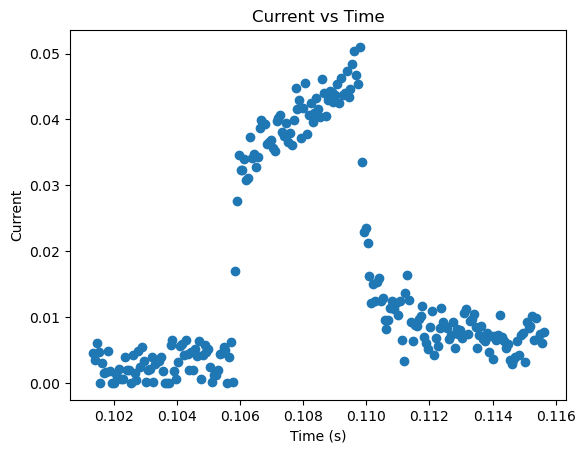

Event               21.000000
Label 1              0.000000
Label 2           1110.000000
Label 3          10110.000000
Probability 1        0.999436
Probability 2        0.000245
Probability 3        0.000143
Name: 20, dtype: float64


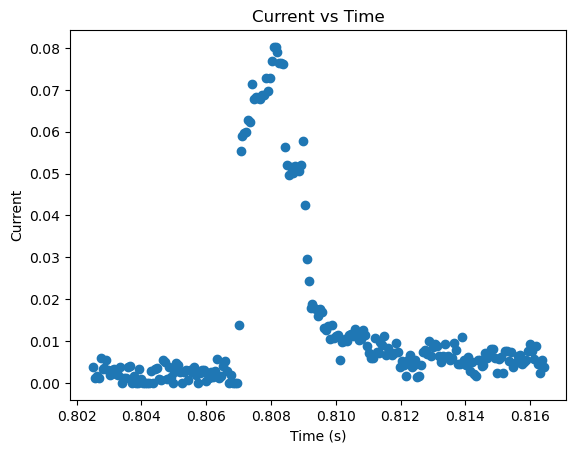

Event                22.000000
Label 1             110.000000
Label 2           10110.000000
Label 3          101110.000000
Probability 1         0.999624
Probability 2         0.000259
Probability 3         0.000095
Name: 21, dtype: float64


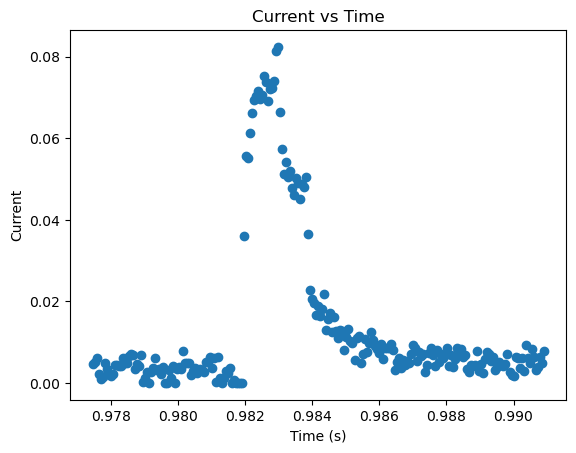

Event               23.000000
Label 1          10110.000000
Label 2            110.000000
Label 3          10010.000000
Probability 1        0.946658
Probability 2        0.038142
Probability 3        0.011528
Name: 22, dtype: float64


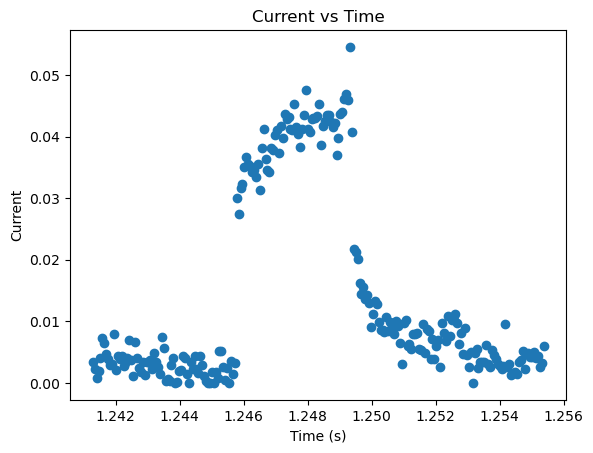

Event               24.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.996458
Probability 2        0.002303
Probability 3        0.000955
Name: 23, dtype: float64


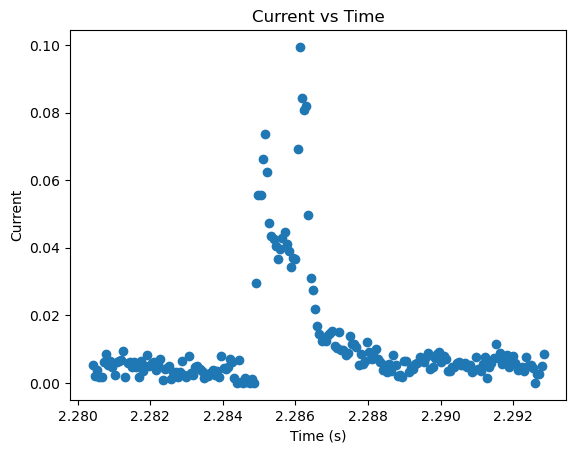

Event               25.000000
Label 1          10100.000000
Label 2          10110.000000
Label 3          10010.000000
Probability 1        0.393354
Probability 2        0.158559
Probability 3        0.140002
Name: 24, dtype: float64


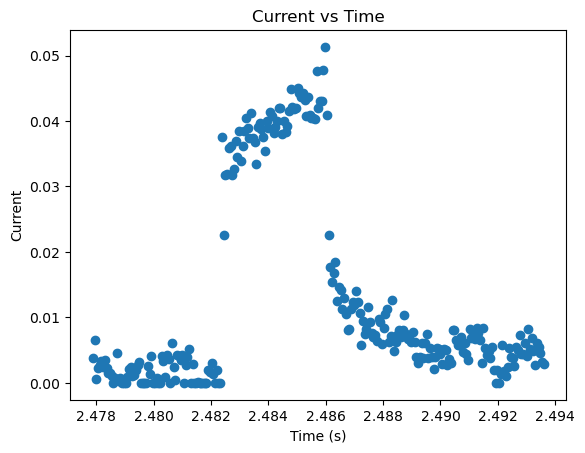

Event               26.000000
Label 1              0.000000
Label 2          10110.000000
Label 3          10100.000000
Probability 1        0.981585
Probability 2        0.012081
Probability 3        0.003632
Name: 25, dtype: float64


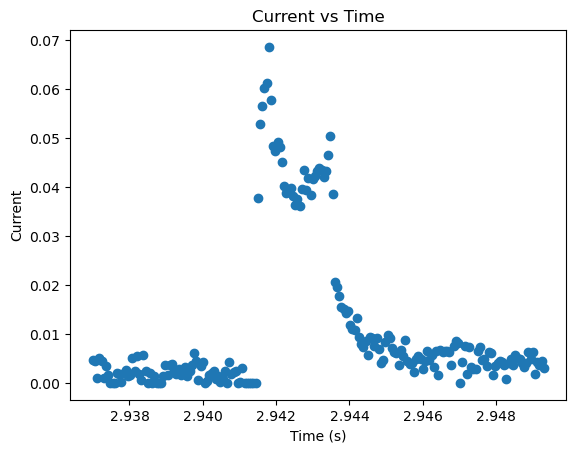

Event                27.000000
Label 1           10110.000000
Label 2           10010.000000
Label 3          101110.000000
Probability 1         0.905700
Probability 2         0.094283
Probability 3         0.000015
Name: 26, dtype: float64


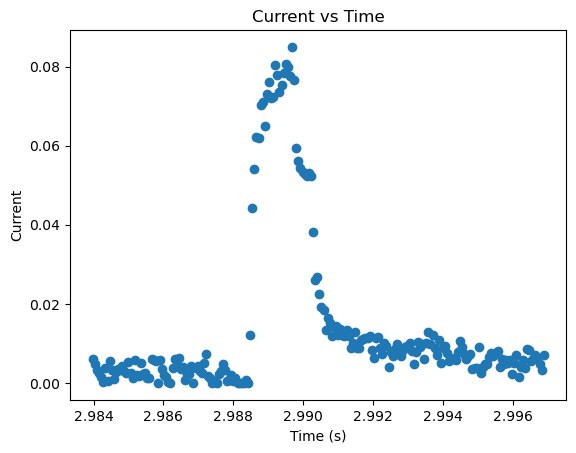

Event                28.000000
Label 1             110.000000
Label 2          101110.000000
Label 3           10110.000000
Probability 1         0.999970
Probability 2         0.000018
Probability 3         0.000007
Name: 27, dtype: float64


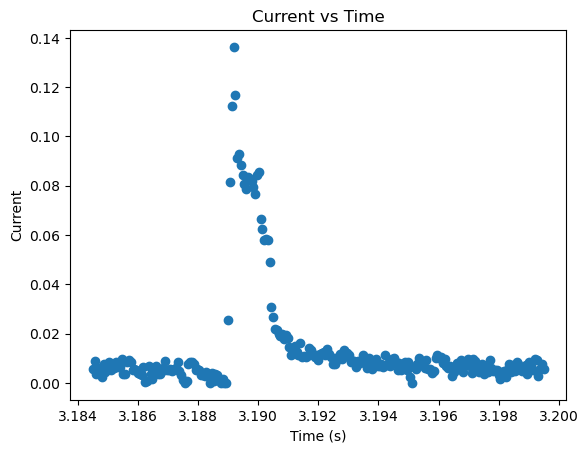

Event                29.000000
Label 1          101111.000000
Label 2           10110.000000
Label 3          101110.000000
Probability 1         0.843000
Probability 2         0.082047
Probability 3         0.063370
Name: 28, dtype: float64


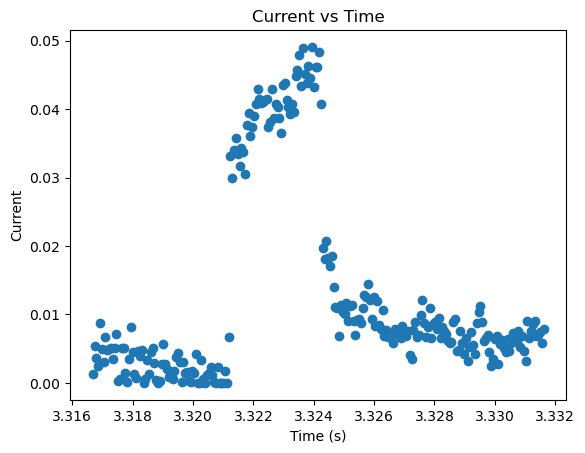

Event              30.000000
Label 1             0.000000
Label 2           110.000000
Label 3          1110.000000
Probability 1       0.999971
Probability 2       0.000026
Probability 3       0.000003
Name: 29, dtype: float64


In [24]:
#load the testing dataset
# Load the .mat file
mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\events_test3.mat')
peak_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\pkmax_test3.mat')
width_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\width_test3.mat')
area_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\area_test3.mat')

for i in range(len(mat_file["Event"][0])):
    # Access the data in the .mat file
    env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

    # Create a plot
    plt.scatter(env_time,env_current)
    plt.xlabel('Time (s)')
    plt.ylabel('Current')
    plt.title('Current vs Time')

    # Show the plot
    plt.show()
    print(all_results.iloc[i+20])